In [1]:
import sklearn
import json
import operator
import matplotlib.pyplot as plt
import prettyplotlib as ppl
%matplotlib inline
agent1 = [sklearn.externals.joblib.load('agent1_ind')]
agent2 = [sklearn.externals.joblib.load('agent2_ind')]
hist1 = sklearn.externals.joblib.load('agent1_indhist')
hist2 = sklearn.externals.joblib.load('agent2_indhist')

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
def loader(dictionary):
    def load_keys(k):
        unjsoned = json.loads(k)
        loaded = tuple( ((tuple(unjsoned[0])), unjsoned[1] ))
        return loaded
    return {load_keys(k):v for k,v in dictionary.items()}
def get_score(hist):
    loaded = {k:len(json.loads(v)) for k,v in loader(hist).items()}
    not_running = sum([v for k,v in loaded.items() if k[0][1] == 'sleeping' and k[0][2]=='sleeping'])
    zero = sum([v for k,v in loaded.items() if k[0][0] == 0])
    total = sum([v for k,v in loaded.items()])
    return not_running, zero, total, not_running/total, zero/total
def get_winners(dictionary):
    states = set([k[0] for k,v in dictionary.items()])
    winners = {}
    for s in states:
        matches = [(v, k[1]) for k,v in dictionary.items() if k[0]==s]
        winners[s] = sorted(matches, key=operator.itemgetter(0))[::-1]
    return {k: v[0][1] for k,v in winners.items()}
print(get_score(hist1))
print(get_score(hist2))

(292, 1338, 3856, 0.07572614107883817, 0.34699170124481327)
(352, 1122, 3787, 0.09294956429891735, 0.29627673620279904)


In [3]:
loaded1 = [loader(i) for i in agent1]
[get_winners(j) for j in loaded1]

[{(0, 'pending', 'pending'): 'go_to_sleep',
  (0, 'pending', 'running'): 'go_to_sleep',
  (0, 'pending', 'sleeping'): 'go_to_sleep',
  (0, 'running', 'pending'): 'prepare_sleep',
  (0, 'running', 'running'): 'prepare_sleep',
  (0, 'running', 'sleeping'): 'prepare_sleep',
  (0, 'sleeping', 'pending'): 'noop',
  (0, 'sleeping', 'running'): 'noop',
  (0, 'sleeping', 'sleeping'): 'wakeup',
  (1, 'pending', 'pending'): 'go_to_sleep',
  (1, 'pending', 'running'): 'go_to_sleep',
  (1, 'pending', 'sleeping'): 'go_to_sleep',
  (1, 'running', 'pending'): 'prepare_sleep',
  (1, 'running', 'running'): 'prepare_sleep',
  (1, 'running', 'sleeping'): 'prepare_sleep',
  (1, 'sleeping', 'pending'): 'wakeup',
  (1, 'sleeping', 'running'): 'wakeup',
  (1, 'sleeping', 'sleeping'): 'wakeup',
  (2, 'pending', 'pending'): 'go_to_sleep',
  (2, 'pending', 'running'): 'go_to_sleep',
  (2, 'pending', 'sleeping'): 'go_to_sleep',
  (2, 'running', 'pending'): 'noop',
  (2, 'running', 'running'): 'prepare_sleep',
  

In [4]:
{k:len(json.loads(v)) for k,v in loader(hist1).items()}

{((0, 'pending', 'pending'), 'go_to_sleep'): 104,
 ((0, 'pending', 'running'), 'go_to_sleep'): 267,
 ((0, 'pending', 'sleeping'), 'go_to_sleep'): 94,
 ((0, 'running', 'pending'), 'noop'): 4,
 ((0, 'running', 'pending'), 'prepare_sleep'): 19,
 ((0, 'running', 'running'), 'noop'): 9,
 ((0, 'running', 'running'), 'prepare_sleep'): 58,
 ((0, 'running', 'sleeping'), 'noop'): 4,
 ((0, 'running', 'sleeping'), 'prepare_sleep'): 34,
 ((0, 'sleeping', 'pending'), 'noop'): 52,
 ((0, 'sleeping', 'pending'), 'wakeup'): 98,
 ((0, 'sleeping', 'running'), 'noop'): 201,
 ((0, 'sleeping', 'running'), 'wakeup'): 190,
 ((0, 'sleeping', 'sleeping'), 'noop'): 49,
 ((0, 'sleeping', 'sleeping'), 'wakeup'): 155,
 ((1, 'pending', 'pending'), 'go_to_sleep'): 70,
 ((1, 'pending', 'running'), 'go_to_sleep'): 130,
 ((1, 'pending', 'sleeping'), 'go_to_sleep'): 59,
 ((1, 'running', 'pending'), 'noop'): 7,
 ((1, 'running', 'pending'), 'prepare_sleep'): 47,
 ((1, 'running', 'running'), 'noop'): 19,
 ((1, 'running', 'ru

In [5]:
record = sklearn.externals.joblib.load('ind_writer')

In [8]:
one = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==0]
two = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==1]

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


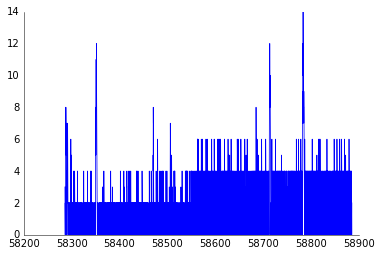

In [10]:
fig,ax = plt.subplots(1)
ppl.plot(ax, [i[0] for i in one],[i[1] for i in one] )


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


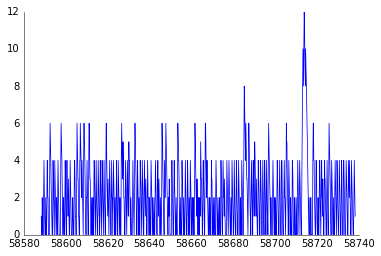

In [19]:
fig, ax = plt.subplots(1)
ppl.plot(ax, [i[0] for i in one[2000:3000]],[i[1] for i in one[2000:3000]] )